(30012, 2)


C:\Users\valen\AppData\Local\Temp\ipykernel_44992\1162779308.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


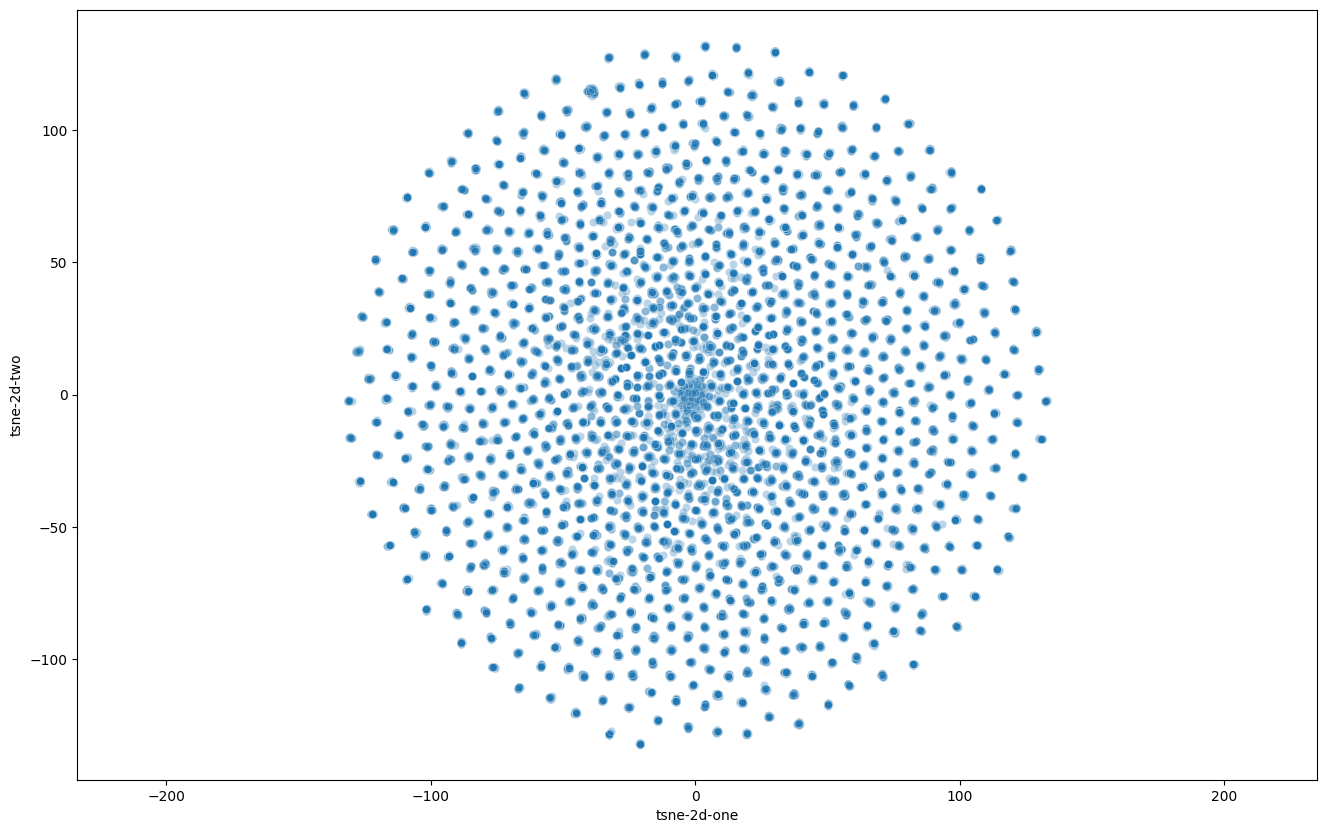

       image_name  5_o_Clock_Shadow  Arched_Eyebrows  Bags_Under_Eyes  Bald  \
13413  091727.jpg                -1               -1               -1    -1   
15616  107251.jpg                -1                1               -1    -1   
24733  168937.jpg                -1                1               -1    -1   
27050  181844.jpg                -1                1               -1    -1   
12378  084472.jpg                -1               -1               -1    -1   
11348  077695.jpg                -1               -1                1    -1   
13645  093456.jpg                -1               -1                1    -1   
13067  089146.jpg                -1               -1               -1    -1   
25864  175242.jpg                -1                1               -1    -1   
28323  190842.jpg                -1               -1               -1    -1   

       Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  Smiling  \
13413     -1        -1        -1          -1          -1

In [31]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_kernels



buffalo_s = pd.read_csv("celeba_buffalo_s.csv")
buffalo_l = pd.read_csv("celeba_buffalo_l.csv")


embedding_names = []
for i in range(512):
    embedding_names.append("embedding_"+str(i))
    
buffalo_s_embed = buffalo_s[embedding_names]
buffalo_s_label = buffalo_s.drop(embedding_names, axis=1)

buffalo_l_embed = buffalo_l[embedding_names]
buffalo_l_label = buffalo_l.drop(embedding_names, axis=1)


#visualise data  using t-SNE

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(buffalo_l_embed)
print(tsne_results.shape)
buffalo_l_embeded = {}
buffalo_l_embeded['tsne-2d-one'] = tsne_results[:,0]
buffalo_l_embeded['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hsv", 10),
    data=buffalo_l_embeded,
    legend="full",
    alpha=0.3
)
plt.axis('equal')

plt.show()
#fin the data closest to the center
center = np.array([0,0])
dist = np.linalg.norm(tsne_results - center, axis=1)
idx = np.argsort(dist)
print(buffalo_l_label.iloc[idx[:10]])



In [16]:
#fin the data closest to the center
min_dist = 100000
max0=np.argmax(tsne_results[:,0])
min0=np.argmin(tsne_results[:,0])
max1=np.argmax(tsne_results[:,1])
min1=np.argmin(tsne_results[:,1])

for i in range(buffalo_l_embeded['tsne-2d-one'].shape[0]):
    dist = np.linalg.norm(tsne_results[i] - center)
    if dist < min_dist:
        min_dist = dist
        idx = i
# print(buffalo_l_label.iloc[idx]["image_name"])
print(buffalo_l_label.iloc[max0]["image_name"])
print(buffalo_l_label.iloc[min0]["image_name"])
print(buffalo_l_label.iloc[max1]["image_name"])
print(buffalo_l_label.iloc[min1]["image_name"])
    
    

011222.jpg
108387.jpg
086062.jpg
111500.jpg


In [29]:
#find 2 images with the same id
count = 0   
for i in range(buffalo_l_label.shape[0]):
    for j in range(i+1, buffalo_l_label.shape[0]):
        if buffalo_l_label.iloc[i]["id"] == buffalo_l_label.iloc[j]["id"]:
            print(buffalo_l_label.iloc[i]["image_name"])
            print(buffalo_l_label.iloc[j]["image_name"])
            print("\n")
            count += 1
            break
        
        if count == 5:
            break
    if count == 5:
        break
    


000001.jpg
000404.jpg


000004.jpg
001778.jpg


000006.jpg
005171.jpg


000008.jpg
004806.jpg


000018.jpg
002755.jpg




In [28]:
# Initialize a dictionary to store the mean distance to the center for each unique id
mean_dist = {}

# Loop through each row in buffalo_l_label to calculate distance from the center for each id
for i in range(buffalo_l_label.shape[0]):
    
    
    # Get the 'id' of the current row (unique identifier for each celebrity)
    celebrity_id = buffalo_l_label.iloc[i]["id"]
    
    # Calculate the distance of the current point to the origin (center)
    distance = np.linalg.norm(tsne_results[i])
    
    # Update the mean distance for the current id
    if celebrity_id not in mean_dist:
        # Initialize dictionary entry with cumulative distance and count
        mean_dist[celebrity_id] = {'total_distance': distance, 'count': 1}
    else:
        # Update cumulative distance and count
        mean_dist[celebrity_id]['total_distance'] += distance
        mean_dist[celebrity_id]['count'] += 1

# Calculate the mean distance for each id
mean_distance_to_center = {key: value['total_distance'] / value['count'] for key, value in mean_dist.items()}

# Find the id with the smallest mean distance to the center
min_id = min(mean_distance_to_center, key=mean_distance_to_center.get)
print(min_id)

# Find the id with the largest mean distance to the center
max_id = max(mean_distance_to_center, key=mean_distance_to_center.get)
print(max_id)

# Find the image names for the celebrity with the smallest mean distance to the center
min_id_images = buffalo_l_label[buffalo_l_label['id'] == min_id]['image_name']
print(min_id_images)
print("nope")

# Find the image names for the celebrity with the largest mean distance to the center
max_id_images = buffalo_l_label[buffalo_l_label['id'] == max_id]['image_name']
print(max_id_images)


5951
59
561      003594.jpg
1678     011214.jpg
1965     013141.jpg
2077     013838.jpg
2312     015536.jpg
3333     022562.jpg
3426     023128.jpg
3698     025028.jpg
4242     028762.jpg
5957     040087.jpg
7317     049362.jpg
7361     049579.jpg
7509     050494.jpg
8246     055662.jpg
11868    081128.jpg
12466    085101.jpg
12919    088187.jpg
13717    094035.jpg
14934    102650.jpg
15963    109478.jpg
16519    113420.jpg
16775    115238.jpg
18180    124821.jpg
18537    127431.jpg
18886    129717.jpg
19762    136069.jpg
22492    155036.jpg
22737    156865.jpg
22899    157970.jpg
23373    161205.jpg
Name: image_name, dtype: object
nope
28       000129.jpg
574      003668.jpg
1840     012332.jpg
2986     020035.jpg
2998     020167.jpg
3625     024490.jpg
4154     028224.jpg
4548     030660.jpg
4572     030801.jpg
5550     037220.jpg
6360     042881.jpg
7515     050516.jpg
8565     057820.jpg
8928     060259.jpg
9469     064256.jpg
9890     067303.jpg
10025    068303.jpg
10965    074968

C:\Users\valen\AppData\Local\Temp\ipykernel_44992\181647872.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


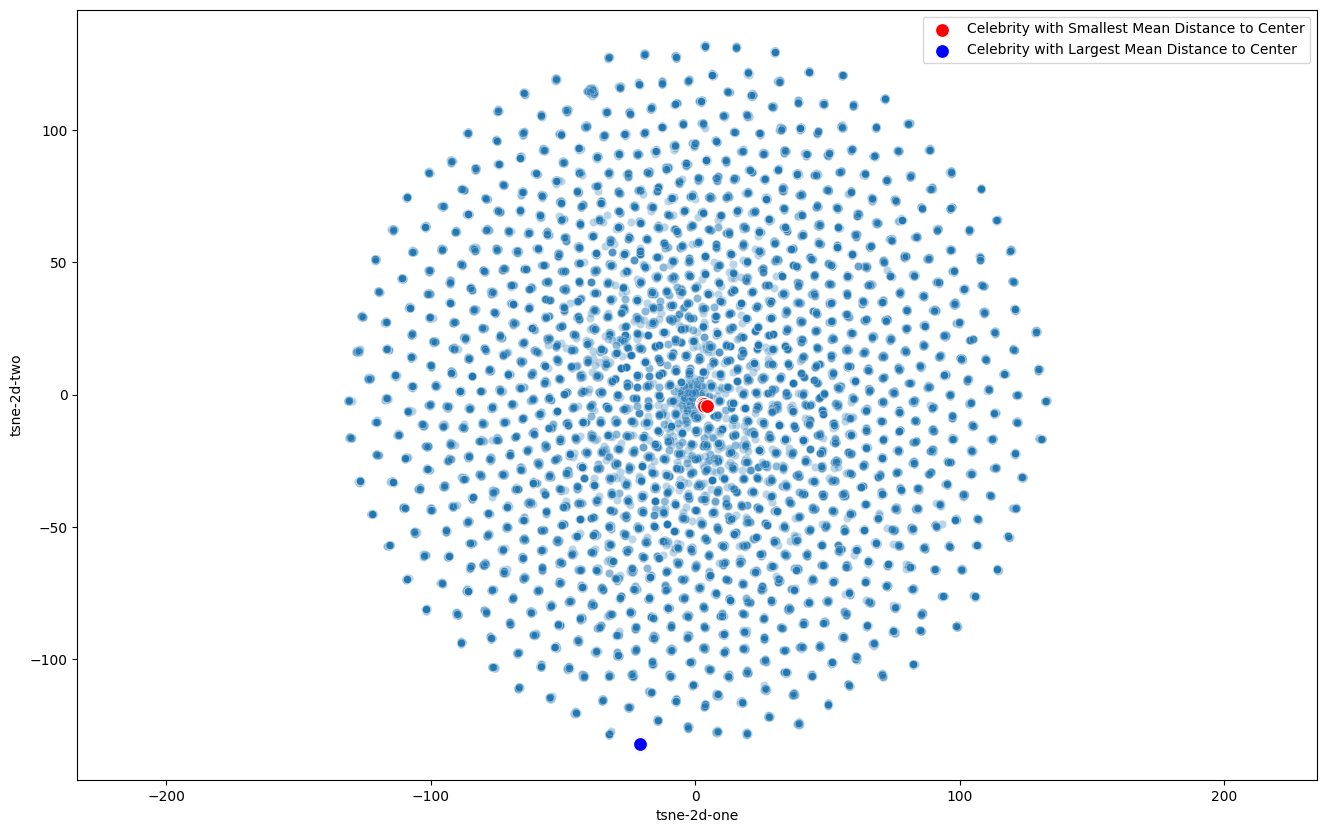

In [32]:
#highlight a certain label in the t-SNE plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hsv", 10),
    data=buffalo_l_embeded,
    legend="full",
    alpha=0.3
)

# Highlight the points corresponding to the celebrity with the smallest mean distance to the center

min_id_indices = buffalo_l_label[buffalo_l_label['id'] == min_id].index
sns.scatterplot(
    x=tsne_results[min_id_indices, 0],
    y=tsne_results[min_id_indices, 1],
    s=100,
    color='red',
    label='Celebrity with Smallest Mean Distance to Center'
)

# Highlight the points corresponding to the celebrity with the largest mean distance to the center
max_id_indices = buffalo_l_label[buffalo_l_label['id'] == max_id].index
sns.scatterplot(
    x=tsne_results[max_id_indices, 0],
    y=tsne_results[max_id_indices, 1],
    s=100,
    color='blue',
    label='Celebrity with Largest Mean Distance to Center'
)
plt.axis('equal')

plt.show()



[ 6369  4407  4310  1446  4323  1946  4887  4225    59  5609  5787  6568
  4099  1435  4328  2219  1322  4288  4686  1634  1250  4496  4080    22
  4374  4395  4717  5341  3981  1862  5407  4306  6079  4334  1272  4166
  4687  6263  1423  4236  1318  4094  1938  4532  5394  4161  4719  1281
  1467  6036  1947  1691  4610  4321  2331  1633  1711  1524 10135 10087
  4414  4710  5479  1448 10082  1422  5178  2425  4724  5566  2334  4256
  4612  6155  4247  6449  1929  4701  5320  4087  2307  4814  5342  6404
  5960  4051  3941  5507  1936  1339  4582  1700  3929  2301  1326  1245
  2221  6412  1264  6241  5921  2114  5391  2335  4715  4373  1228    47
  1336  5902  5488  1871  6427  1383  1297  4511  2125  5569  5287  5353
    21  2314  6087  2325  4309  6555  1246  4209  4251    17  5382  6417
  1279  1812  4628  1559  5386  1944  2309  4308  1481  4338 10096  3959
  5340  6556  2349  1447    23  2406  4157  6288  1337  1439  6088  4577
  4625  4637  4143  4221  6009  3980  5780  5495  6

C:\Users\valen\AppData\Local\Temp\ipykernel_44992\1290948947.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


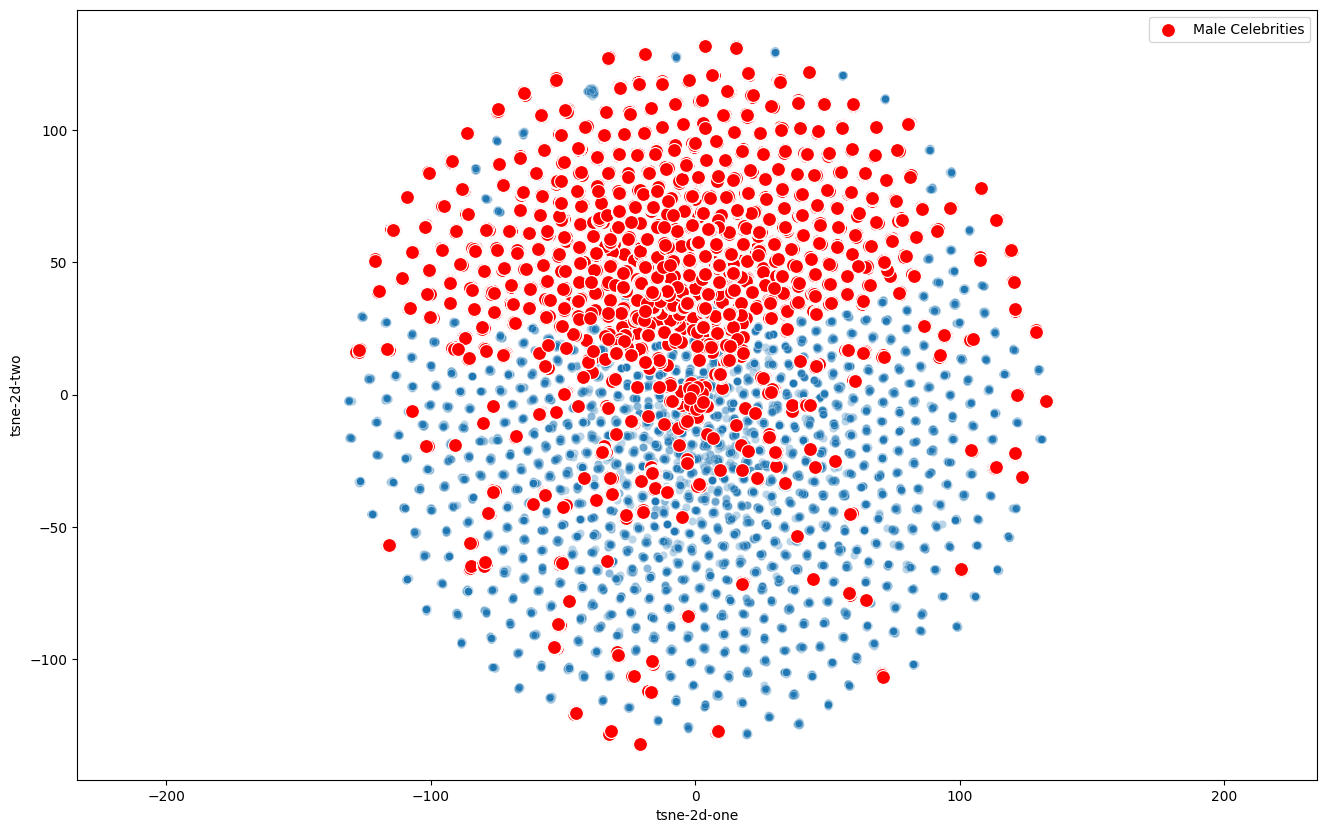

In [ ]:
#Highlight the chubby celebrities in the t-SNE plot

#find the id of the chubby celebrities
chubby_id = buffalo_l_label[buffalo_l_label["Male"] == 1]["id"].unique()
print(chubby_id)

#find the indices of the chubby celebrities
chubby_indices = []
for i in chubby_id:
    chubby_indices.extend(buffalo_l_label[buffalo_l_label["id"] == i].index)
    
#highlight the chubby celebrities
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hsv", 10),
    data=buffalo_l_embeded,
    legend="full",
    alpha=0.3
)

sns.scatterplot(
    x=tsne_results[chubby_indices, 0],
    y=tsne_results[chubby_indices, 1],
    s=100,
    color='red',
    label='Male Celebrities'
)
plt.axis('equal')

plt.show()


In [34]:
print(buffalo_l_label.columns)

Index(['image_name', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young', 'id'],
      dtype='object')


[18.264795 39.104527]
[[  42.469093   -61.086655 ]
 [ -36.78544    -40.59041  ]
 [  60.996563   -99.65365  ]
 ...
 [  12.239537     2.7740004]
 [  90.527466    31.75367  ]
 [-126.68552    -32.816784 ]]
21.109274 38.802166
 avg [18.264795 39.104527]


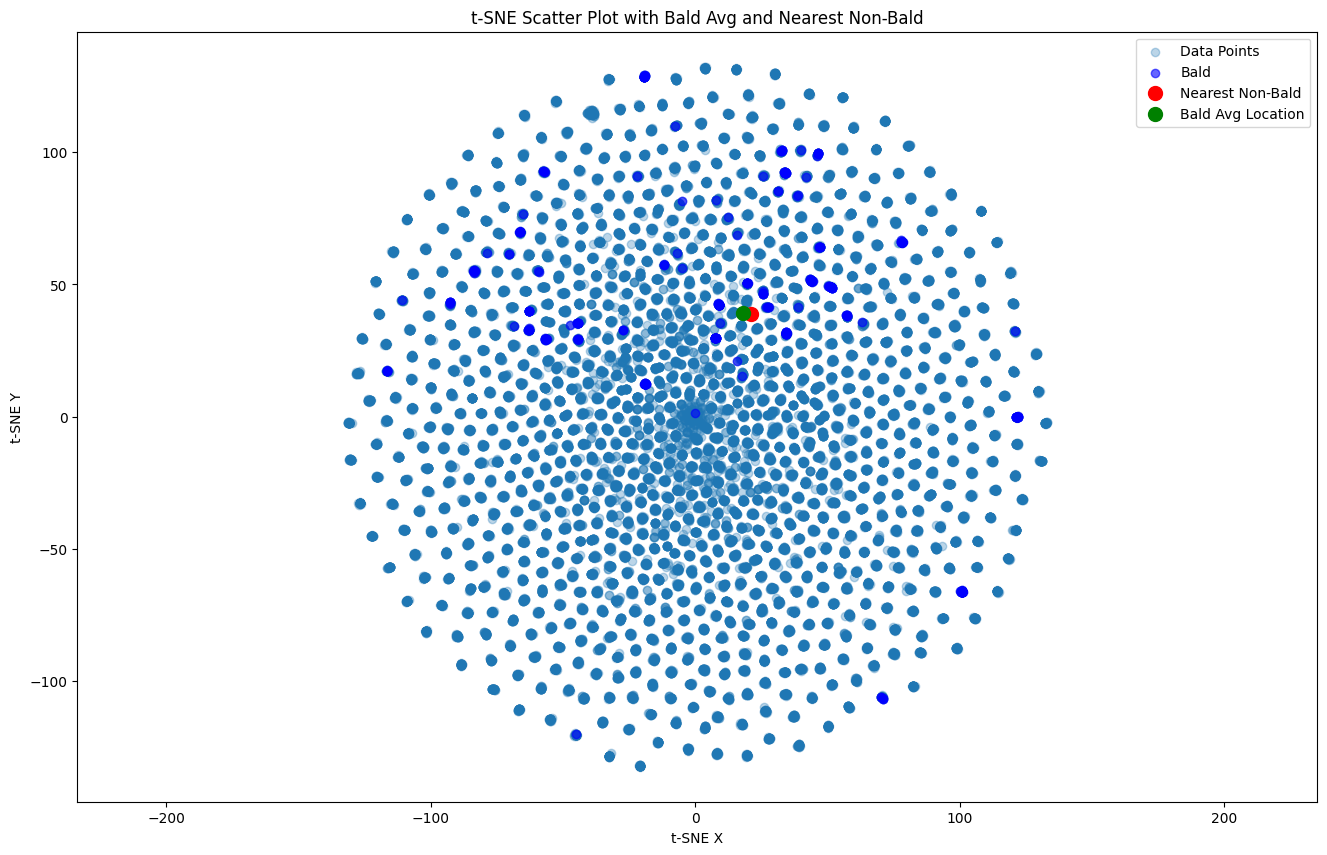

Average location of Bald: [18.264795 39.104527]
Nearest non-Bald to this point:
id                  1420
tsne_x         21.109274
tsne_y         38.802166
image_name    027596.jpg
Name: 4067, dtype: object


In [65]:
import numpy as np
import matplotlib.pyplot as plt
label='Bald'
# Extract t-SNE coordinates
tsne_x = tsne_results[:, 0]
tsne_y = tsne_results[:, 1]

# Add t-SNE coordinates to the label dataframe
buffalo_l_label['tsne_x'] = tsne_x
buffalo_l_label['tsne_y'] = tsne_y

# Filter male and non-male indices
males = buffalo_l_label[buffalo_l_label[label] == 1]
non_males = buffalo_l_label[buffalo_l_label[label] == -1]

# Compute the average location of males in the t-SNE plane
male_avg_x = males['tsne_x'].mean()
male_avg_y = males['tsne_y'].mean()
male_avg_location = np.array([male_avg_x, male_avg_y])
print(male_avg_location)


# Compute distances of non-males to the male average location
non_male_coords = non_males[['tsne_x', 'tsne_y']].values
print(non_male_coords)
distances = np.linalg.norm(non_male_coords - male_avg_location, axis=1)

# Find the nearest non-male to the male average location
nearest_non_male_index = np.argmin(distances)
nearest_non_male = non_males.iloc[nearest_non_male_index]

# Retrieve image name of the nearest non-male
nearest_image_name = nearest_non_male['image_name']

# Plot the t-SNE scatter plot and annotate points
plt.figure(figsize=(16, 10))

# Scatterplot of all points
plt.scatter(tsne_x, tsne_y, alpha=0.3, label='Data Points')

# Highlight males in blue
plt.scatter(males['tsne_x'], males['tsne_y'], color='blue', alpha=0.6, label=label)

# Highlight the nearest non-male point in red
plt.scatter(nearest_non_male['tsne_x'], nearest_non_male['tsne_y'], color='red', s=100, label='Nearest Non-'+label)
print(nearest_non_male['tsne_x'], nearest_non_male['tsne_y'])
# Annotate the nearest non-male image name
#plt.text(
#    nearest_non_male['tsne_x'], 
#    nearest_non_male['tsne_y'], 
#    nearest_image_name, 
#    fontsize=12, 
#    color='black', 
#    bbox=dict(facecolor='white', alpha=0.5)
#)

# Annotate the male average location
plt.scatter(male_avg_x, male_avg_y, color='green', s=100, label=label+' Avg Location')
print(f' avg {male_avg_location}')
#plt.text(
#    male_avg_x, 
#    male_avg_y, 
#    'Chubby Avg', 
#    fontsize=12, 
#    color='green', 
#    bbox=dict(facecolor='white', alpha=0.5)
#)

plt.legend()
plt.title('t-SNE Scatter Plot with '+label+' Avg and Nearest Non-'+label)
plt.xlabel('t-SNE X')
plt.ylabel('t-SNE Y')
plt.axis('equal')
plt.show()

# Output results
print("Average location of "+label+":", male_avg_location)
print("Nearest non-"+label+" to this point:")
print(nearest_non_male[['id', 'tsne_x', 'tsne_y', 'image_name']])

